# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import matplotlib as mpl

# set the style as 'bmh'
mpl.style.use('bmh')


# Import API key
from api_keys import api_key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

625

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Weather API Key
api_key = api_keys.api_key

url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
# Create empty list
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

# Start counter
record = 1

# Log file 
print("Beginning Data Retrieval")
print("-----------------------------")

# Loop through cities
for city in cities:
    
    try:
        response = requests.get(f"{url}&q={city}").json()
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        max_temp.append(response["main"]["temp_max"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
        city_record = response["name"]
        print(f"Processing Record {record} | {city_record}")
        print(f"{url}&q={city}")
              
        # Increases counter by one
        record = record + 1
        
        # timer to not exceed limit of API
        time.sleep(1.01)
     
    # Skip if city not found           
    except: 
        print("City not found. Skipping...")
    continue
                                

Beginning Data Retrieval
-----------------------------
Processing Record 1 | Beloha
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=703b5369eb2d7f5063246a6ebd46bcb4&q=beloha
Processing Record 2 | Cape Town
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=703b5369eb2d7f5063246a6ebd46bcb4&q=cape town
City not found. Skipping...
Processing Record 3 | Moratuwa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=703b5369eb2d7f5063246a6ebd46bcb4&q=moratuwa
Processing Record 4 | San Miguel
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=703b5369eb2d7f5063246a6ebd46bcb4&q=san miguel
Processing Record 5 | Bluff
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=703b5369eb2d7f5063246a6ebd46bcb4&q=bluff
Processing Record 6 | Nikolskoye
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=703b5369eb2d7f5063246a6ebd46bcb4&q=nikolskoye
City not found. Skipping...
Processing Record 7 | New Norfo

Processing Record 57 | Muli
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=703b5369eb2d7f5063246a6ebd46bcb4&q=muli
Processing Record 58 | Timmins
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=703b5369eb2d7f5063246a6ebd46bcb4&q=timmins
Processing Record 59 | Syracuse
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=703b5369eb2d7f5063246a6ebd46bcb4&q=syracuse
Processing Record 60 | Mitu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=703b5369eb2d7f5063246a6ebd46bcb4&q=mitu
Processing Record 61 | Barrow
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=703b5369eb2d7f5063246a6ebd46bcb4&q=barrow
Processing Record 62 | Siwana
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=703b5369eb2d7f5063246a6ebd46bcb4&q=siwana
Processing Record 63 | Orda
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=703b5369eb2d7f5063246a6ebd46bcb4&q=orda
Processing Record 64 | Sla

Processing Record 113 | Port Lincoln
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=703b5369eb2d7f5063246a6ebd46bcb4&q=port lincoln
Processing Record 114 | Pedernales
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=703b5369eb2d7f5063246a6ebd46bcb4&q=pedernales
Processing Record 115 | Sorong
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=703b5369eb2d7f5063246a6ebd46bcb4&q=sorong
Processing Record 116 | Rundu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=703b5369eb2d7f5063246a6ebd46bcb4&q=rundu
Processing Record 117 | Toora-Khem
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=703b5369eb2d7f5063246a6ebd46bcb4&q=toora-khem
Processing Record 118 | Sao Joao da Barra
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=703b5369eb2d7f5063246a6ebd46bcb4&q=sao joao da barra
Processing Record 119 | Kloulklubed
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=70

Processing Record 168 | Nelson Bay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=703b5369eb2d7f5063246a6ebd46bcb4&q=nelson bay
Processing Record 169 | Labuhan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=703b5369eb2d7f5063246a6ebd46bcb4&q=labuhan
City not found. Skipping...
City not found. Skipping...
Processing Record 170 | Narsaq
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=703b5369eb2d7f5063246a6ebd46bcb4&q=narsaq
City not found. Skipping...
Processing Record 171 | Ancud
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=703b5369eb2d7f5063246a6ebd46bcb4&q=ancud
Processing Record 172 | Punta Arenas
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=703b5369eb2d7f5063246a6ebd46bcb4&q=punta arenas
Processing Record 173 | Santa Isabel do Rio Negro
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=703b5369eb2d7f5063246a6ebd46bcb4&q=santa isabel do rio negro
City not fou

Processing Record 223 | Nuuk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=703b5369eb2d7f5063246a6ebd46bcb4&q=nuuk
Processing Record 224 | Constitucion
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=703b5369eb2d7f5063246a6ebd46bcb4&q=constitucion
Processing Record 225 | Bondo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=703b5369eb2d7f5063246a6ebd46bcb4&q=bondo
Processing Record 226 | Gashua
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=703b5369eb2d7f5063246a6ebd46bcb4&q=gashua
Processing Record 227 | Boca do Acre
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=703b5369eb2d7f5063246a6ebd46bcb4&q=boca do acre
Processing Record 228 | Poltava
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=703b5369eb2d7f5063246a6ebd46bcb4&q=poltava
Processing Record 229 | Port Macquarie
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=703b5369eb2d7f5063246a6ebd4

Processing Record 278 | Ibra
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=703b5369eb2d7f5063246a6ebd46bcb4&q=ibra
City not found. Skipping...
Processing Record 279 | Sangar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=703b5369eb2d7f5063246a6ebd46bcb4&q=sangar
Processing Record 280 | Pemba
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=703b5369eb2d7f5063246a6ebd46bcb4&q=pemba
Processing Record 281 | Missoula
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=703b5369eb2d7f5063246a6ebd46bcb4&q=missoula
City not found. Skipping...
Processing Record 282 | Sungairaya
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=703b5369eb2d7f5063246a6ebd46bcb4&q=sungairaya
Processing Record 283 | Fortuna Foothills
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=703b5369eb2d7f5063246a6ebd46bcb4&q=fortuna foothills
Processing Record 284 | Westport
http://api.openweathermap.org/data/2.

Processing Record 333 | Vanimo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=703b5369eb2d7f5063246a6ebd46bcb4&q=vanimo
Processing Record 334 | Mier
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=703b5369eb2d7f5063246a6ebd46bcb4&q=mier
Processing Record 335 | Djibo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=703b5369eb2d7f5063246a6ebd46bcb4&q=djibo
Processing Record 336 | Fuzhou
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=703b5369eb2d7f5063246a6ebd46bcb4&q=fuzhou
Processing Record 337 | Mecca
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=703b5369eb2d7f5063246a6ebd46bcb4&q=mecca
Processing Record 338 | Zhangye
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=703b5369eb2d7f5063246a6ebd46bcb4&q=zhangye
City not found. Skipping...
Processing Record 339 | Rio Grande
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=703b5369eb2d7f5063246a6ebd46b

Processing Record 388 | Amapa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=703b5369eb2d7f5063246a6ebd46bcb4&q=amapa
Processing Record 389 | Yulara
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=703b5369eb2d7f5063246a6ebd46bcb4&q=yulara
Processing Record 390 | Kalmunai
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=703b5369eb2d7f5063246a6ebd46bcb4&q=kalmunai
Processing Record 391 | Ambilobe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=703b5369eb2d7f5063246a6ebd46bcb4&q=ambilobe
Processing Record 392 | Broken Hill
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=703b5369eb2d7f5063246a6ebd46bcb4&q=broken hill
Processing Record 393 | Bindi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=703b5369eb2d7f5063246a6ebd46bcb4&q=bindi
Processing Record 394 | Howard
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=703b5369eb2d7f5063246a6ebd46bcb4&q=howard

Processing Record 444 | Ketchikan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=703b5369eb2d7f5063246a6ebd46bcb4&q=ketchikan
Processing Record 445 | Lata
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=703b5369eb2d7f5063246a6ebd46bcb4&q=lata
City not found. Skipping...
Processing Record 446 | Newport
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=703b5369eb2d7f5063246a6ebd46bcb4&q=newport
Processing Record 447 | Sabzevar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=703b5369eb2d7f5063246a6ebd46bcb4&q=sabzevar
Processing Record 448 | Isangel
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=703b5369eb2d7f5063246a6ebd46bcb4&q=isangel
City not found. Skipping...
City not found. Skipping...
Processing Record 449 | Kirakira
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=703b5369eb2d7f5063246a6ebd46bcb4&q=kirakira
Processing Record 450 | Batagay
http://api.openweatherma

Processing Record 499 | Valdosta
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=703b5369eb2d7f5063246a6ebd46bcb4&q=valdosta
Processing Record 500 | Ouesso
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=703b5369eb2d7f5063246a6ebd46bcb4&q=ouesso
Processing Record 501 | Princeton
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=703b5369eb2d7f5063246a6ebd46bcb4&q=princeton
Processing Record 502 | Malchevskaya
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=703b5369eb2d7f5063246a6ebd46bcb4&q=malchevskaya
Processing Record 503 | Saint-Joseph
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=703b5369eb2d7f5063246a6ebd46bcb4&q=saint-joseph
Processing Record 504 | Jaggayyapeta
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=703b5369eb2d7f5063246a6ebd46bcb4&q=jaggayyapeta
Processing Record 505 | Knysna
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=703b5369e

In [5]:
# Create a dictionary 
weatherpy_dict = {
    "City": city_name,
    "Cloudiness": cloudiness,
    "Country": country,
    "Date": date,
    "Humidity": humidity,
    "Lat": lat,
    "Lng": lng,
    "Max Temp": max_temp,
    "Wind Speed": wind_speed
}

# Create a DataFrame using dictionary
weather_data = pd.DataFrame(weatherpy_dict)

# Remove NaN rows and Count of weather data
weather_data = weather_data.dropna()
weather_data.count()

City          549
Cloudiness    549
Country       549
Date          549
Humidity      549
Lat           549
Lng           549
Max Temp      549
Wind Speed    549
dtype: int64

In [6]:
# Save DataFrame to CSV
weather_data.to_csv("Plot_Outputs/weather_data.csv")

In [7]:
# Display DataFrame Head
weather_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Beloha,2,MG,1559362547,96,-25.17,45.06,63.06,5.21
1,Cape Town,90,ZA,1559362331,100,-33.93,18.42,53.01,2.24
2,Moratuwa,20,LK,1559362549,79,6.77,79.88,84.20,6.93
3,San Miguel,90,AR,1559362552,100,-34.54,-58.72,59.00,3.38
4,Bluff,67,AU,1559362553,31,-23.58,149.07,66.30,10.76


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

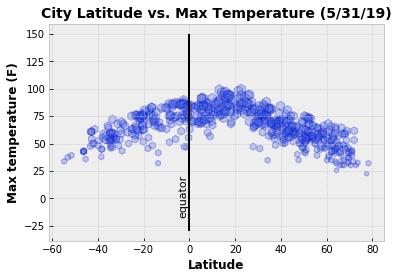

In [8]:
# Scatter Plot - Latitude vs. Temperature Plot
# Used hexagon1 as marker

plt.scatter(weather_data["Lat"], weather_data["Max Temp"], marker="h", s = max_temp * 10, color = 'royalblue', edgecolor="mediumblue", alpha=0.3, linewidth = 1.0)

# Graph Properties
plt.title("City Latitude vs. Max Temperature (5/31/19)", weight = 'semibold', fontsize = 14)
plt.xlabel("Latitude", weight = 'semibold', fontsize = 12)
plt.ylabel("Max temperature (F)", weight = 'semibold', fontsize = 12)
plt.grid(color='#BDC3C7', linewidth=.50)
plt.vlines(0,-30,150)
plt.text(-5,15,'equator', rotation=90, fontsize = 11)

# Save Scatter Plot
# Resolution is measured as the number of color pixel dot per inch (dpi)
# The standard dpi is 96, poster quality is 300 but it's a much bigger file
plt.savefig("Plot_Outputs/City_Lat_vs_Max_temp.png", bbox_inches="tight", dpi=150)


#Show Scatter Plot
plt.show()

#### Latitude vs. Humidity Plot

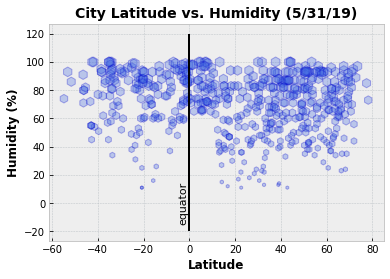

In [9]:
# Scatter Plot - Latitude vs. Humidity Plot
# Used hexagon1 as marker
plt.scatter(weather_data["Lat"], weather_data["Humidity"], marker="h", s = humidity * 10, color = 'royalblue', edgecolor="mediumblue", alpha=0.3, linewidth = 1.0, zorder=2)

# Graph Properties
plt.title("City Latitude vs. Humidity (5/31/19)", weight = 'semibold', fontsize = 14)
plt.xlabel("Latitude", weight = 'semibold', fontsize = 12)
plt.ylabel("Humidity (%)", weight = 'semibold', fontsize = 12)
plt.grid(color='#BDC3C7', linewidth=.50)
plt.vlines(0, -20, 120)
plt.text(-5,10,'equator', rotation=90, fontsize = 11)



# Save Scatter Plot
# Resolution is measured as the number of color pixel dot per inch (dpi)
# The standard dpi is 96, poster quality is 300 but it's a much bigger file
plt.savefig("Plot_Outputs/City_Lat_vs_Humidity.png", bbox_inches="tight", dpi=150)

#Show Scatter Plot
plt.show()

#### Latitude vs. Cloudiness Plot

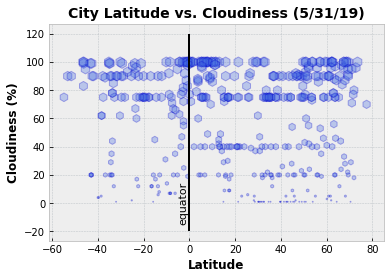

In [10]:
# Scatter Plot - Latitude vs. Cloudiness Plot
# Used hexagon1 as marker
plt.scatter(weather_data["Lat"], weather_data["Cloudiness"], marker="h", s = cloudiness * 10, color = 'royalblue', edgecolor="mediumblue", alpha=0.3, linewidth = 1.0, zorder=2)

# Graph Properties
plt.title("City Latitude vs. Cloudiness (5/31/19)", weight = 'semibold', fontsize = 14)
plt.xlabel("Latitude", weight = 'semibold', fontsize = 12)
plt.ylabel("Cloudiness (%)", weight = 'semibold', fontsize = 12)
plt.grid(color='#BDC3C7', linewidth=.50)
plt.vlines(0, -20, 120)
plt.text(-5,10,'equator', rotation=90, fontsize = 11)


# Save Scatter Plot
# Resolution is measured as the number of color pixel dot per inch (dpi)
# The standard dpi is 96, poster quality is 300 but it's a much bigger file
plt.savefig("Plot_Outputs/City_Lat_vs_Cloudiness.png", bbox_inches="tight", dpi=150)

#Show Scatter Plot
plt.show()

#### Latitude vs. Wind Speed Plot

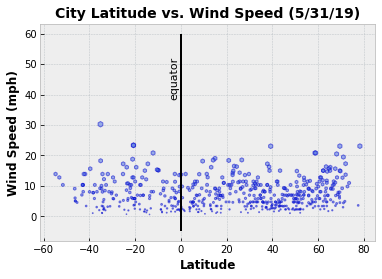

In [11]:
# Scatter Plot - Latitude vs. Wind Speed Plot
# Used hexagon1 as marker
plt.scatter(weather_data["Lat"], weather_data["Wind Speed"], marker="h", s = wind_speed * 10, color = 'royalblue', edgecolor="mediumblue", alpha=0.5, linewidth = 1.0, zorder=2)

# Graph Properties
plt.title("City Latitude vs. Wind Speed (5/31/19)", weight = 'semibold', fontsize = 14)
plt.xlabel("Latitude", weight = 'semibold', fontsize = 12)
plt.ylabel("Wind Speed (mph)", weight = 'semibold', fontsize = 12)
plt.grid(color='#BDC3C7', linewidth=.50)
plt.vlines(0,-5,60)
plt.text(-5,50,'equator', rotation=90, fontsize = 11)

# Save Scatter Plot
# Resolution is measured as the number of color pixel dot per inch (dpi)
# The standard dpi is 96, poster quality is 300 but it's a much bigger file
plt.savefig("Plot_Outputs/City_Lat_vs_WindSpeed.png", bbox_inches="tight", dpi=150)

#Show Scatter Plot
plt.show()